In [62]:
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
from __future__ import print_function
import random
random.seed(2010)

import keras
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras import backend as K


In [63]:
inv_f = lambda x : MC.inverse_uniform(x,0,1000)
X = MC.RandomVariable(inv_f,"uniform distribution from x=1:5")
sample_ratio  = .5

def two_linear_functions(x,slope1,slope2,intercept1,intercept2,std_dev1=1,std_dev2=1):
    coin_toss = (random.random() > sample_ratio)
    if coin_toss:
        return (MC.Linear_GaussianNoise(x,slope1,intercept1,std_dev1))
    else:
        return (MC.Linear_GaussianNoise(x,slope2,intercept2,std_dev2))
cost_f = lambda x : (x,two_linear_functions(x,1,0,0,0,20,20))
generate_toy_data = MC.Simulator(X,cost_f,'generator for two linear functions from x=1:5', verbose = True)

for y in generate_toy_data.sample_repeated(10):
    print (y)

testing random variable with distribution uniform distribution from x=1:5,
 139

New simulator for generator for two linear functions from x=1:5,
 with uniform distribution from x=1:5 input
(486.6525117612371, 25.327588389560912)
(546.662624463851, 22.939018309499364)
(973.4140484418796, 12.972449066554734)
(878.1434984088488, 13.243575252828217)
(755.8576184813135, 31.472183852380162)
(605.2944401934303, 17.33300073120872)
(496.1507553335034, 458.0295510958256)
(495.99104578343145, 528.9790453906727)
(223.13309886940226, -20.183950457011534)
(648.9468843408174, -8.901663845394921)


In [73]:
#################################
#######Construct Network#########
#################################


# Define sudoMin loss function


# Convolutional layers

# Example from Keras github


batch_size = 1
no_predictions = 80
epochs = 500

def customLoss(yTrue,yPred):
    print(K.eval(yTrue))
    print(K.eval(yPred))
    assert(0)
    return K.min(K.square(yTrue-yPred))



sample_ratio = .5
TrainData = list(generate_toy_data.sample_repeated(1000))
x_train, y_train  = zip(*TrainData)
TestData = list(generate_toy_data.sample_repeated(300))
x_test, y_test  = zip(*TestData)
x_train = np.array(x_train,ndmin = 2).T
y_train = np.array(y_train,ndmin = 2).T
x_test = np.array(x_test,ndmin = 2).T
y_test = np.array(y_test,ndmin = 2).T
# the data, split between train and test sets

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices


model = Sequential()
model.add(Dense(32, activation='relu',
                kernel_initializer='random_uniform', bias_initializer='zeros',
                input_shape=[1]))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu',
                kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu',
                kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(no_predictions, activation='linear'))

model.compile(loss=customLoss,
              optimizer=keras.optimizers.Nadam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])



x_train shape: (1000, 1)
1000 train samples
300 test samples


KeyboardInterrupt: 

Text(0.5,1,'Multimodal Output, Toy Results')

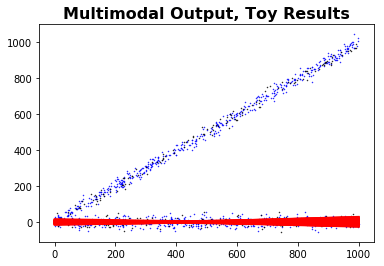

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

X = np.linspace(0, 1000, 200)
Y = model.predict(X)

plt.plot(X,Y, 'r-') 
plt.scatter(x_train, y_train,s = .2, c='blue')
plt.scatter(x_test, y_test, s = .2 ,c='black')
#plt.ylim(0,300)
# Add title and x, y labels
plt.title("Multimodal Output, Toy Results", fontsize=16, fontweight='bold')


In [66]:
#Visualize Nodes
Y

array([[0.00000000e+00, 5.47307491e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.44827461e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.42347431e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.39867282e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.37387252e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.34907162e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.32427192e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.29947102e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.27467132e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.24986982e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.22506952e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.20026922e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.17546892e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.15066862e-01, 0.00000000e